In [118]:
import pandas as pd
import csv
import sqlalchemy as sqAl
from sqlalchemy import create_engine




psql_username = 'postgres'
from config import psql_password 
database_name = 'postgres'
host = 'illinoiseducation.cseojgcrzzgi.us-east-1.rds.amazonaws.com'

connection_string = f'postgresql://{psql_username}:{psql_password}@{host}:5432/{database_name}'

engine = create_engine(connection_string)

In [119]:
district_df = pd.read_sql("select * from district", engine)
#district_df = pd.read_csv("clean_data/district_filtered.csv")
district_df = district_df.astype({'Student Enrollment - Total': float,
                                'Student Enrollment - Low Income %': float,
                                'Avg Class Size – All Grades': float,
                                'Avg Teaching Exp': float,
                                'Bachelor Degree': float,
                                'Masters Degree ': float,
                                'Teacher Retention Rate': float,
                                'Teacher Avg Salary': float,
                                'Admin Avg Salary': float})
district_df.head(1)

,RCDTS,Type,District,City,County,District Type,District Size,Student Enrollment - Total,Student Enrollment - Low Income %,Avg Class Size – All Grades,Avg Teaching Exp,Bachelor Degree,Masters Degree,Teacher Retention Rate,Teacher Avg Salary,Admin Avg Salary
0,010010010260000,District,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,559.0,48.8,17.0,11.5,56.3,43.8,92.9,36085.63,72141.72


In [120]:
district_df = district_df.filter(['RCDTS',
                            'Student Enrollment - Total',
                            'Student Enrollment - Low Income %',
                            'Avg Class Size – All Grades',
                            'Avg Teaching Exp',
                            'Bachelor Degree',
                            'Masters Degree ',
                            'Teacher Retention Rate',
                            'Teacher Avg Salary',
                            'Admin Avg Salary'          
                           ], axis = 1)
district_df.rename(columns = {'Student Enrollment - Total':'Enrollment'}, inplace = True)
district_df.rename(columns = {'Student Enrollment - Low Income %':'LowIncome'}, inplace = True)
district_df.rename(columns = {'Avg Class Size – All Grades':'ClassSize'}, inplace = True)
district_df.rename(columns = {'Avg Teaching Exp':'AvgTeachExp'}, inplace = True)
district_df.rename(columns = {'Bachelor Degree':'BS'}, inplace = True)
district_df.rename(columns = {'Masters Degree ':'MS'}, inplace = True)
district_df.rename(columns = {'Teacher Retention Rate':'TeachRetRate'}, inplace = True)
district_df.rename(columns = {'Teacher Avg Salary':'TeachAvgSal'}, inplace = True)
district_df.rename(columns = {'Admin Avg Salary':'AvgSalary'}, inplace = True)
district_df

,RCDTS,Enrollment,LowIncome,ClassSize,AvgTeachExp,BS,MS,TeachRetRate,TeachAvgSal,AvgSalary
0,010010010260000,559.0,48.8,17.0,11.5,56.3,43.8,92.9,36085.63,72141.72
1,010010020260000,602.0,24.9,20.0,13.5,41.9,58.1,91.5,41534.22,83605.24
2,010010030260000,874.0,46.7,19.0,12.5,42.9,57.1,81.3,47686.51,75068.50
3,010010040260000,674.0,20.2,18.0,14.1,61.3,38.7,89.7,40254.81,83692.00
4,010011720220000,6469.0,60.7,18.0,12.0,56.9,42.6,73.6,45089.41,82764.57
...,...,...,...,...,...,...,...,...,...,...
481,56099201U260000,4893.0,68.5,21.0,11.7,39.3,60.7,82.3,59303.62,105027.16
482,56099207U260000,1478.0,20.6,18.0,13.9,55.2,43.8,80.6,45051.57,91263.46
483,56099209U260000,1355.0,42.0,20.0,11.9,47.9,49.9,88.6,47004.75,99781.38
484,56099255U260000,1500.0,38.7,21.0,13.5,31.3,68.7,83.5,57410.56,107871.60


In [121]:
scores_df = pd.read_csv("clean_data/ELA and Math Districts.csv")
scores_df = scores_df.astype({'ELA': int, 'Math': int})
scores_df

,RCDTS,County,Dist #,District Name/ School Name,City,ELA,Math
0,010010010260000,Adams,10,Payson CUSD 1,Payson,524,489
1,010010020260000,Adams,20,Liberty CUSD 2,Liberty,500,485
2,010010030260000,Adams,30,Central CUSD 3,Camp Point,490,488
3,010010040260000,Adams,40,CUSD 4,Mendon,505,485
4,010011720220000,Adams,1720,Quincy SD 172,Quincy,489,473
...,...,...,...,...,...,...,...
482,56099201U260000,Will,201U,Crete Monee CUSD 201U,Crete,479,444
483,56099207U260000,Will,207U,Peotone CUSD 207U,Peotone,513,492
484,56099209U260000,Will,209U,Wilmington CUSD 209U,Wilmington,480,458
485,56099255U260000,Will,255U,Reed Custer CUSD 255U,Braidwood,479,483


In [122]:
merge_df = pd.merge(district_df, scores_df, on = "RCDTS", how = "inner")
merge_df = merge_df.dropna()
merge_df =merge_df.drop(columns = ['RCDTS', 'County ', 'Dist # ', 'District Name/ School Name', 'City'])
merge_df

,Enrollment,LowIncome,ClassSize,AvgTeachExp,BS,MS,TeachRetRate,TeachAvgSal,AvgSalary,ELA,Math
0,559.0,48.8,17.0,11.5,56.3,43.8,92.9,36085.63,72141.72,524,489
1,602.0,24.9,20.0,13.5,41.9,58.1,91.5,41534.22,83605.24,500,485
2,874.0,46.7,19.0,12.5,42.9,57.1,81.3,47686.51,75068.50,490,488
3,674.0,20.2,18.0,14.1,61.3,38.7,89.7,40254.81,83692.00,505,485
4,6469.0,60.7,18.0,12.0,56.9,42.6,73.6,45089.41,82764.57,489,473
...,...,...,...,...,...,...,...,...,...,...,...
470,4893.0,68.5,21.0,11.7,39.3,60.7,82.3,59303.62,105027.16,479,444
471,1478.0,20.6,18.0,13.9,55.2,43.8,80.6,45051.57,91263.46,513,492
472,1355.0,42.0,20.0,11.9,47.9,49.9,88.6,47004.75,99781.38,480,458
473,1500.0,38.7,21.0,13.5,31.3,68.7,83.5,57410.56,107871.60,479,483


In [123]:
X = merge_df.drop(columns = ['ELA', 'Math'], axis = 1)
X.head(2)

,Enrollment,LowIncome,ClassSize,AvgTeachExp,BS,MS,TeachRetRate,TeachAvgSal,AvgSalary
0,559.0,48.8,17.0,11.5,56.3,43.8,92.9,36085.63,72141.72
1,602.0,24.9,20.0,13.5,41.9,58.1,91.5,41534.22,83605.24


In [124]:
y = merge_df['Math']

In [125]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [126]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [127]:
y_prediction =  LR.predict(x_test)
y_prediction

array([505.77345284, 529.58124966, 530.63496942, 445.76168104,
       463.68670175, 456.52928693, 485.51182492, 493.73382299,
       474.997878  , 481.94074924, 476.50802353, 492.18390659,
       520.3045517 , 493.59867728, 478.08755525, 499.43677141,
       479.62518599, 464.60708846, 477.82335862, 464.16557521,
       493.36282712, 481.74936309, 467.55266412, 447.51558701,
       482.04032012, 520.87394955, 508.26187727, 428.13883651,
       464.33143575, 524.93744247, 523.24332569, 402.99239936,
       522.54578536, 536.1292525 , 440.67668112, 482.61379811,
       488.27593354, 456.18778936, 467.65544894, 410.81269557,
       471.45990083, 545.49267535, 496.67425642, 492.49317101,
       448.03428214, 491.22347285, 515.83716105, 467.61714576,
       435.35850915, 492.31146433, 474.60791474, 429.66693604,
       519.76939903, 502.78694349, 455.04236721, 471.079652  ,
       471.47773245, 480.71327876, 501.87048688, 500.12249234,
       509.04119248, 518.95387269, 459.9722973 , 474.11

r2 score is  0.5731203255902038
mean_sqrd_error is== 670.2609702270148
root_mean_squared error of is== 25.889398800030385


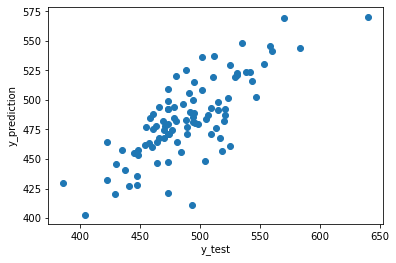

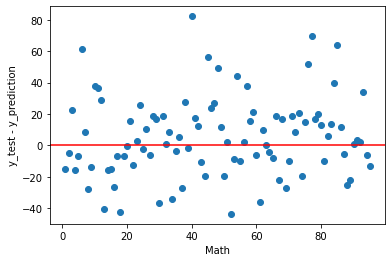

In [128]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

my_length = []
i = 1
while i <= len(y_test):
    my_length.append(i)
    i += 1

#scatter plot of test vs prediction
plt.scatter(y_test, y_prediction)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.show()
plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.xlabel('Math')
plt.axhline(y = 0, c = "red")
plt.show()

r2 score is  0.5898927796523947
mean_sqrd_error is== 428.3934128095401
root_mean_squared error of is== 20.697666844587584


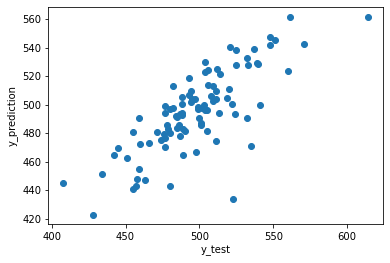

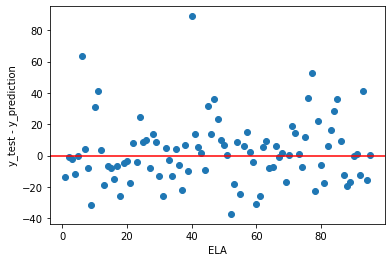

In [129]:
y = merge_df['ELA']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

my_length = []
i = 1
while i <= len(y_test):
    my_length.append(i)
    i += 1

#scatter plot of test vs prediction
plt.scatter(y_test, y_prediction)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.show()
plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.xlabel('ELA')
plt.axhline(y = 0, c = "red")
plt.show()

r2 score is  0.6034983283319617
mean_sqrd_error is== 1978.7224153978839
root_mean_squared error of is== 44.482832816693275


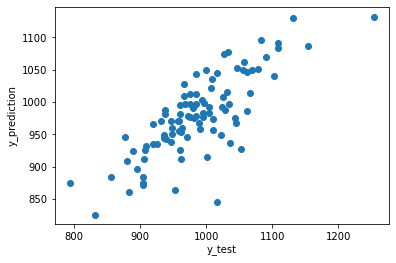

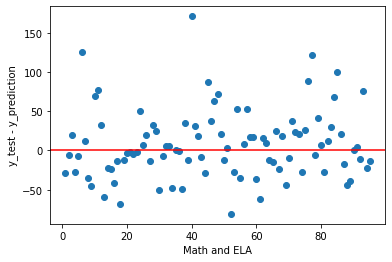

In [130]:
merge_df['ELA/Math Sum'] = merge_df['ELA'] +  merge_df['Math']
y = merge_df['ELA/Math Sum']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

my_length = []
i = 1
while i <= len(y_test):
    my_length.append(i)
    i += 1

#scatter plot of test vs prediction
plt.scatter(y_test, y_prediction)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.show()
plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.xlabel('Math and ELA')
plt.axhline(y = 0, c = "red")
plt.show()